## Import Libraries

In [1]:
%matplotlib inline
import pandas as pd
from sklearn.linear_model import LinearRegression,SGDRegressor
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.decomposition import PCA


## Import Dataset

In [2]:
df = pd.read_csv("car_price.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


## Check Null Values

In [3]:
df.isnull().sum() 

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

## Drop Null values

In [4]:
df.dropna(inplace=True)

## Check Duplicates

In [5]:
df.duplicated().sum()

1189

## Drop Duplicates

In [6]:
df.drop_duplicates(inplace=True)

## Data Info

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   object 
 9   engine         6717 non-null   object 
 10  max_power      6717 non-null   object 
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 734.7+ KB


### Make function and convert columns to their actual data type

In [8]:
def extract_value(value):
    value = value.split()[0]
    return value.strip()

In [9]:
df["mileage"] = df["mileage"].apply(extract_value).astype(float)

In [10]:
df["engine"] = df["engine"].apply(extract_value).astype(float)

In [11]:
df["max_power"] = df["max_power"].apply(extract_value).astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6717 non-null   object 
 1   year           6717 non-null   int64  
 2   selling_price  6717 non-null   int64  
 3   km_driven      6717 non-null   int64  
 4   fuel           6717 non-null   object 
 5   seller_type    6717 non-null   object 
 6   transmission   6717 non-null   object 
 7   owner          6717 non-null   object 
 8   mileage        6717 non-null   float64
 9   engine         6717 non-null   float64
 10  max_power      6717 non-null   float64
 11  torque         6717 non-null   object 
 12  seats          6717 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 734.7+ KB


## Describe Data

In [13]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,6717.000000,6.717000e+03,6.717000e+03,6717.000000,6717.000000,6717.000000,6717.000000
mean,2013.611136,5.263860e+05,7.339834e+04,19.466585,1430.985857,87.766100,5.434271
std,3.897402,5.235504e+05,5.870328e+04,4.048102,493.469198,31.724555,0.983805
min,1994.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,32.800000,2.000000
25%,2011.000000,2.500000e+05,3.800000e+04,16.800000,1197.000000,67.100000,5.000000
50%,2014.000000,4.200000e+05,6.820300e+04,19.440000,1248.000000,81.830000,5.000000
75%,2017.000000,6.500000e+05,1.000000e+05,22.500000,1498.000000,100.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


### Extract numerical columns and categorical columns 

In [14]:
cat =[]
num =[]
for col in df.columns:
    if df[col].dtypes=="O":
        cat.append(col)
    else:
        num.append(col)
    

In [15]:
num

['year',
 'selling_price',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'seats']

## Check Outliers

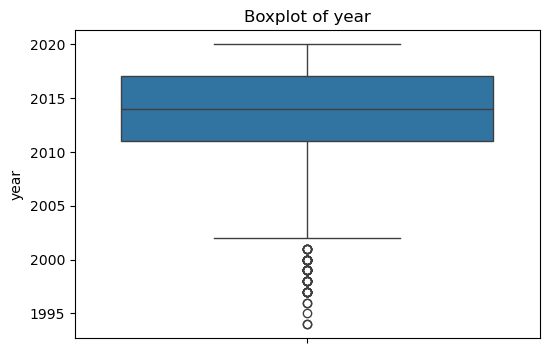

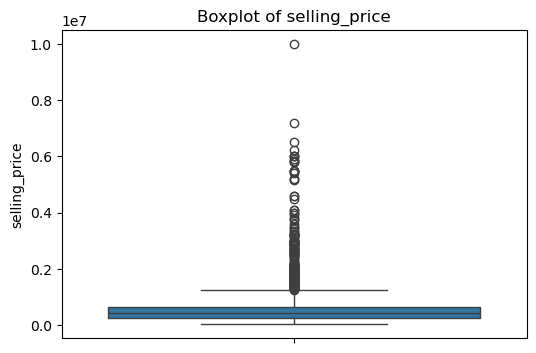

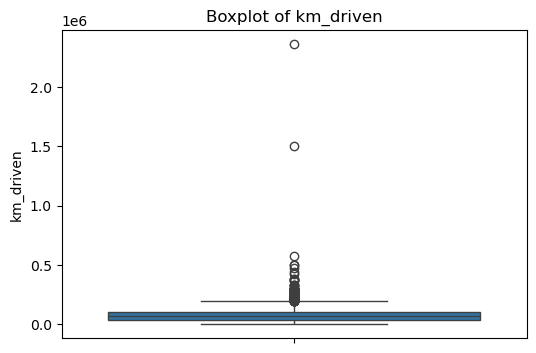

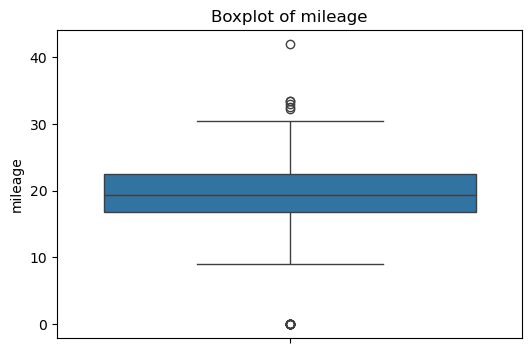

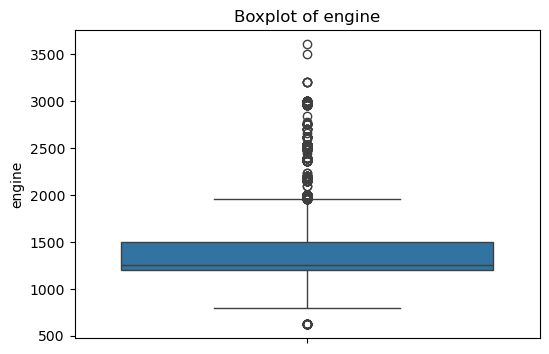

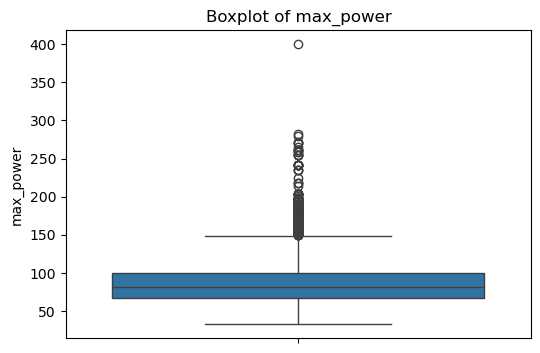

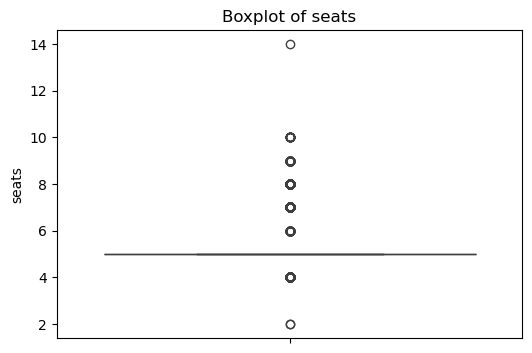

In [16]:
for column in num:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

### Make kdeplot


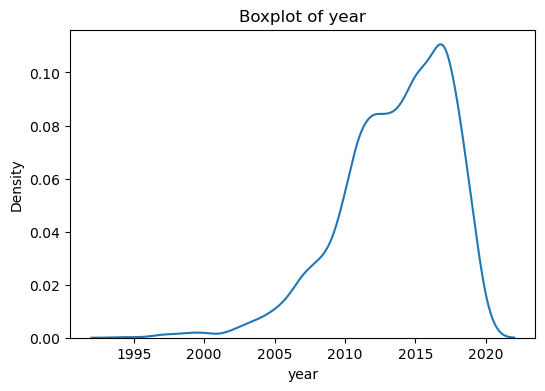

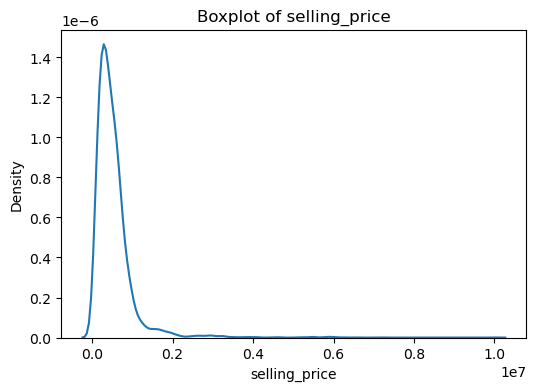

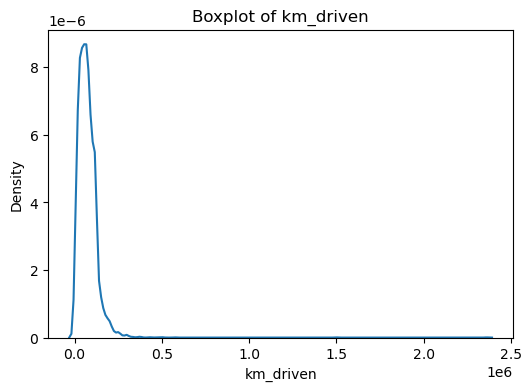

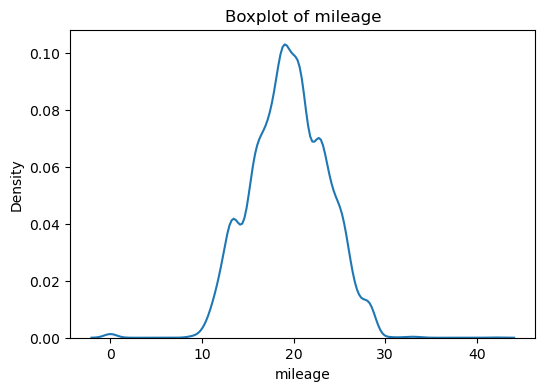

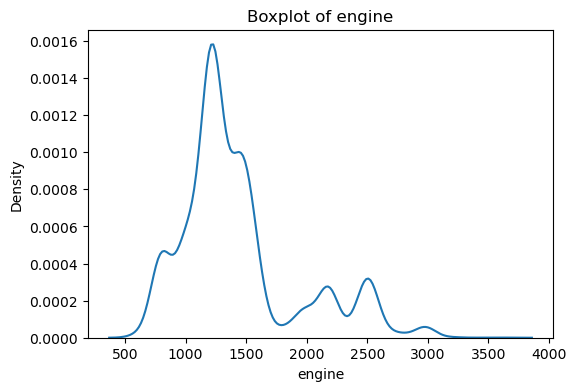

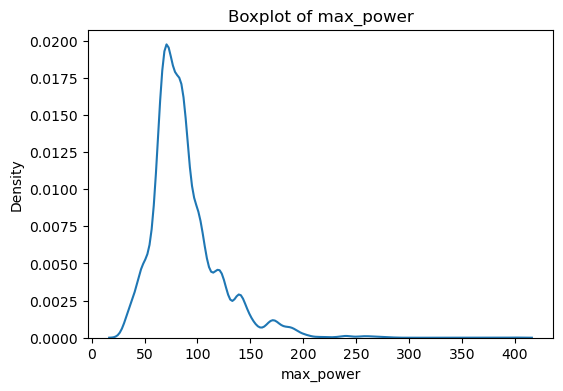

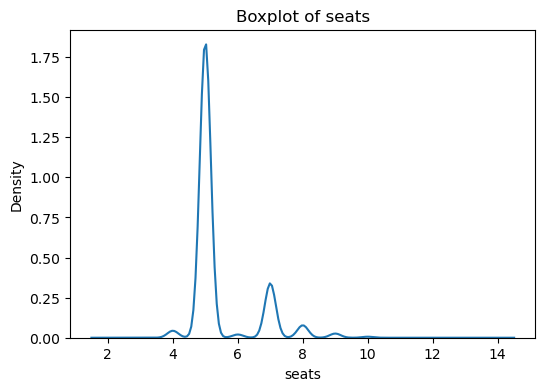

In [17]:
for column in num:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

### Removing Outliers 

#### year

In [18]:
q3 = df["year"].quantile(0.75)
q1 = df["year"].quantile(0.25)

In [19]:
iqr = q3 - q1

In [20]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

In [21]:
upper_limit

2026.0

In [22]:
lower_limit

2002.0

In [23]:
df = df[(df["year"]>lower_limit)&(df["year"]<upper_limit)]

<Axes: ylabel='year'>

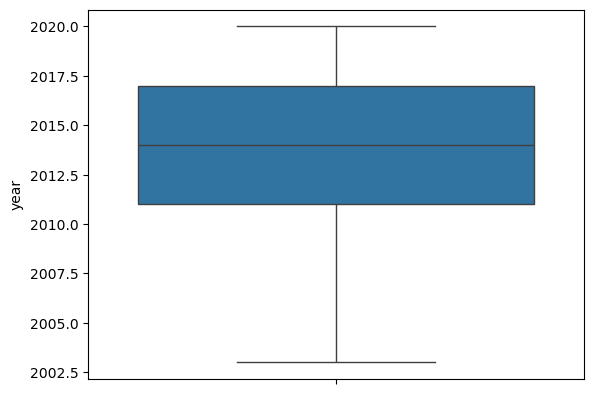

In [24]:
sns.boxplot(df["year"])

#### km_driven

In [25]:
q3 = df["km_driven"].quantile(0.75)
q1 = df["km_driven"].quantile(0.25)

In [26]:
iqr = q3-q1

In [27]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

In [28]:
upper_limit

194500.0

In [29]:
lower_limit

-57500.0

In [30]:
df=df[(df["km_driven"]>lower_limit)&(df["km_driven"]<upper_limit)]

<Axes: ylabel='km_driven'>

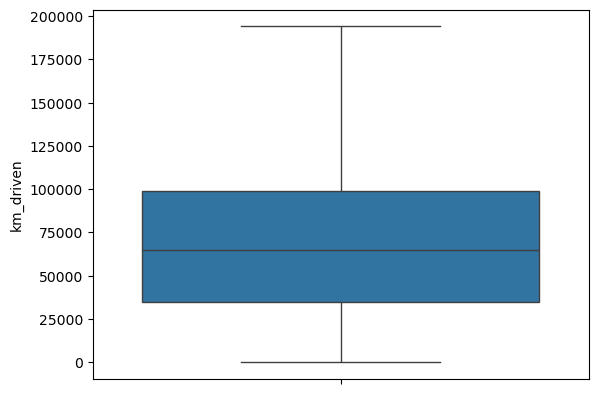

In [31]:
sns.boxplot(df["km_driven"])

#### mileage

In [32]:
upper_limit = df["mileage"].mean() + 3 * df["mileage"].std()
lower_limit = df["mileage"].mean() - 3* df["mileage"].std()

In [33]:
upper_limit

31.642688432526665

In [34]:
lower_limit

7.539004183474571

In [35]:
df = df[(df["mileage"]>lower_limit)&(df["mileage"]<upper_limit)]

<Axes: ylabel='mileage'>

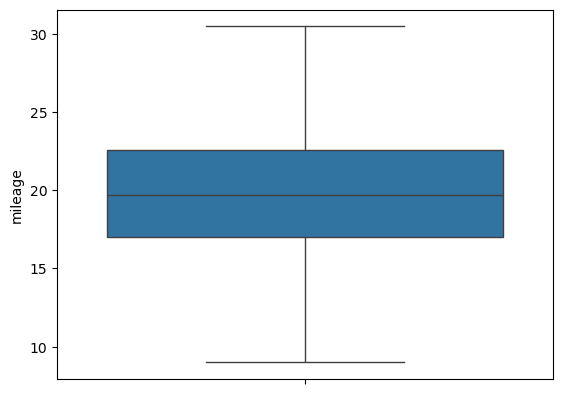

In [36]:
sns.boxplot(df["mileage"])

#### engine

In [37]:
q3 = df["engine"].quantile(0.75)
q1 = df["engine"].quantile(0.25)

In [38]:
iqr = q3 -q1

In [39]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

In [40]:
upper_limit

1949.5

In [41]:
lower_limit

745.5

In [42]:
df = df[(df["engine"]>lower_limit)&(df["engine"]<upper_limit)]

<Axes: ylabel='engine'>

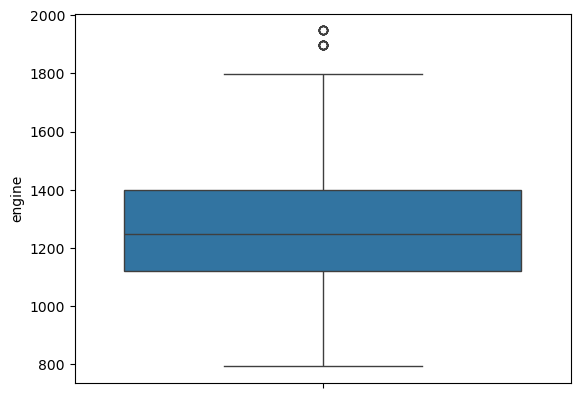

In [43]:
sns.boxplot(df["engine"])

#### max_power

In [44]:
q3= df["max_power"].quantile(0.75)
q1 = df["max_power"].quantile(0.25)

In [45]:
iqr = q3 -q1

In [46]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

In [47]:
upper_limit

121.17500000000001

In [48]:
lower_limit

34.65499999999998

In [49]:
df=df[(df["max_power"]>lower_limit)&(df["max_power"]<upper_limit)]

<Axes: ylabel='max_power'>

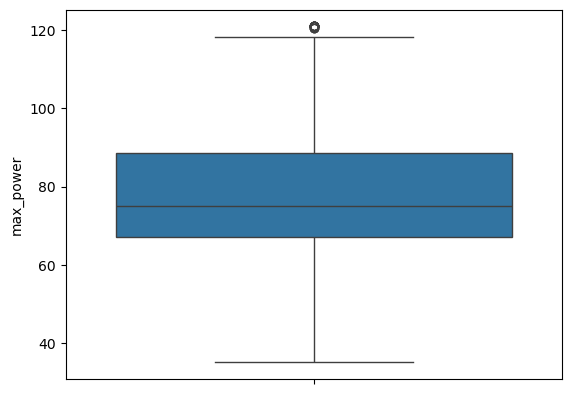

In [50]:
sns.boxplot(df["max_power"])

#### seats

In [51]:
q3 = df["seats"].quantile(0.75)
q1 = df["seats"].quantile(0.25)

In [52]:
iqr = q3 - q1

In [53]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

In [54]:
upper_limit

5.0

In [55]:
lower_limit

5.0

In [56]:
df["seats"] = np.where(df["seats"]>upper_limit,upper_limit,
                       np.where(df["seats"]<lower_limit,lower_limit,df["seats"]))

<Axes: ylabel='seats'>

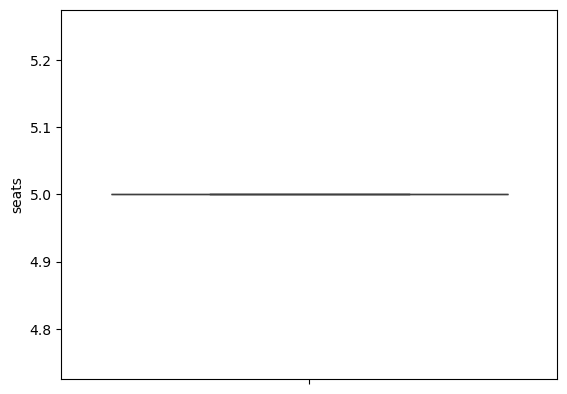

In [57]:
sns.boxplot(df["seats"])

### Doing EDA Using Pandas Profiling

In [58]:
pf = ProfileReport(df)
pf.to_file(output_file="car_predict.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [59]:
df.head(1)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248.0,74.0,190Nm@ 2000rpm,5.0


#### train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=["selling_price"]),df["selling_price"],test_size=0.2,random_state=42)

In [61]:
x_train

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
5050,Maruti Vitara Brezza ZDi Plus Dual Tone,2018,25000,Diesel,Individual,Manual,First Owner,24.30,1248.0,88.50,200Nm@ 1750rpm,5.0
2156,Hyundai i20 1.2 Spotz,2018,15000,Petrol,Individual,Manual,First Owner,18.60,1197.0,81.83,114.7Nm@ 4000rpm,5.0
2934,Maruti Alto K10 VXI,2018,11500,Petrol,Individual,Manual,First Owner,23.95,998.0,67.05,90Nm@ 3500rpm,5.0
974,Chevrolet Sail Hatchback LS ABS,2013,65000,Diesel,Individual,Manual,First Owner,22.10,1248.0,76.90,205Nm@ 1750rpm,5.0
2877,Volkswagen Vento Diesel Highline,2013,120000,Diesel,Individual,Manual,Second Owner,20.54,1598.0,103.60,250Nm@ 1500-2500rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7030,Hyundai i20 1.2 Spotz,2018,15000,Petrol,Individual,Manual,First Owner,18.60,1197.0,81.83,114.7Nm@ 4000rpm,5.0
687,Hyundai Santro Xing GLS,2014,60000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.1Nm@ 3000rpm,5.0
4892,Chevrolet Spark 1.0 LS,2008,100000,Petrol,Individual,Manual,Third Owner,18.00,995.0,62.00,90.3Nm@ 4200rpm,5.0
5939,Maruti Alto K10 VXI,2017,25000,Petrol,Individual,Manual,First Owner,23.95,998.0,67.05,90Nm@ 3500rpm,5.0


### Make transformers for pipeline

In [62]:
trf1 = ColumnTransformer([
    ("ohe",OneHotEncoder(sparse_output=False,handle_unknown="ignore"),[0,3,4,10]),
    ("od",OrdinalEncoder(categories=[["Manual","Automatic"],["Test Drive Car","Fourth & Above Owner","Third Owner","Second Owner","First Owner"]]),[5,6])
    
],remainder="passthrough")

In [63]:
trf2 = ColumnTransformer([
    ("scaling",StandardScaler(),slice(0,1638))
])

In [64]:
trf3 = SGDRegressor(max_iter=1000,penalty="l1",alpha=0.0001,eta0=0.001)

### Fit transformers in pipeline

In [65]:
pipe=Pipeline([
    ("trf1",trf1),
    ("trf2",trf2),
    ("trf3",trf3),

])

### Give the data to the model

In [66]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 3, 4, 10]),
                                                 ('od',
                                                  OrdinalEncoder(categories=[['Manual',
                                                                              'Automatic'],
                                                                             ['Test '
                                                                              'Drive '
                                                                              'Car',
                                                                              'Fourth '
                                                                              '& '
                                                                              'Above '
                                                                              'Owner',
                                                                              'Third '
                                                                              'Owner',
                                                                              'Second '
                                                                              'Owner',
                                                                              'First '
                                                                              'Owner']]),
                                                  [5, 6])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                                  slice(0, 1638, None))])),
                ('trf3', SGDRegressor(eta0=0.001, penalty='l1'))])

### Predict the values 

In [67]:
y_pred = pipe.predict(x_test)

### Calculate r2_score

In [68]:
print(r2_score(y_test,y_pred)*100)

87.58537686265136


### Calculate mean_absolute_error

In [72]:
print(mean_absolute_error(y_test,y_pred))

56757.22294926546


### Calcualte r2_score and mean_absolute_error on training data

In [69]:
y_pred2 = pipe.predict(x_train)

In [70]:
print(r2_score(y_train,y_pred2)*100)

95.56590031464253


In [73]:
print(mean_absolute_error(y_train,y_pred2))

33756.33699711472


# Thank you!